In [111]:
import matplotlib.pyplot as plt

In [125]:
#import necessary gene data and store in dictionary with key being the gene name and the value being the gene coordinates
gene_data = open('./mm10_refseq_genes_chr6_50M_60M.bed', 'r')
gene = {}
for line in gene_data:
    lines = line.split('\t')
    gene_name = lines[12]
    gene.setdefault(gene_name, [int(lines[4]), int(lines[5])])
print(len(gene))    

115


In [137]:
#import sorted bedgraph data and store in dictionary with the site as the key and the methylation level as the value
E4 = open('./bismark926.sorted.bedGraph')
E4_me = {}
for line in E4:
    if 'track' in line:
        continue
    else:
        lines = line.rstrip().split('\t')
        if lines[3] == '0':
            continue
        else:
            me_level = lines[3]
            me_level = float(me_level)
            me_site = float(lines[1])
            E4_me.setdefault(me_site, me_level)
print(len(E4_me))                                                        

12985


In [128]:
#average the methylation level for each gene by adding the methylation at each site
E4_comb = {}

for key, value in gene.items():
    me = 0
    for site, level in E4_me.items():
        if site >= value[0] and site <= value[1]:
            me += level
    E4_comb.setdefault(key, me)
print(len(E4_comb))         

{'Mpp6': 11301.106717356719, 'Dfna5': 4360.606060606061, 'Osbpl3': 12785.271994087783, 'Cycs': 297.4747474747475, '5430402O13Rik': 3270.396825396826, 'Mir6371': 0, '4921507P07Rik': 2457.6190476190477, 'Npvf': 400.0, 'C530044C16Rik': 7114.594294594294, 'Mir148a': 100.0, 'Gm6559': 2061.746031746032, 'Nfe2l3': 3307.9975579975585, 'Hnrnpa2b1': 440.00000000000006, 'Cbx3': 1262.7813852813852, 'Snx10': 6991.587301587303, 'Skap2': 18944.053030303025, 'Halr1': 200.0, 'Hoxa1': 0, 'Hotairm1': 100.0, 'Hoxa2': 16.6666666666667, 'Hoxaas2': 214.2857142857143, 'Hoxa3': 2198.8888888888887, 'Hoxa4': 33.3333333333333, 'Hoxaas3': 916.6666666666667, 'Hoxa5': 100.0, 'Hoxa6': 16.6666666666667, 'Mira': 0, 'Hoxa7': 200.0, 'Hoxa9': 383.3333333333333, 'Mir196b': 100.0, 'Hoxa10': 945.2380952380952, 'Hoxa11': 200.0, 'Hoxa11os': 100.0, 'Hoxa13': 100.0, 'Hottip': 383.3333333333333, 'Evx1os': 696.6666666666665, 'Evx1': 733.3333333333335, '1700094M24Rik': 673.3333333333333, 'Hibadh': 13787.686516382166, 'Tax1bp1': 726

In [129]:
E5 = open('./bismark929.sorted.bedGraph')
E5_me = {}
for line in E5:
    if 'track' in line:
        continue
    else:
        lines = line.rstrip().split('\t')
        me_level = float(lines[3])
        me_site = float(lines[1])
        E5_me.setdefault(me_site, me_level)
#print(E5_me)

In [131]:
E5_comb = {}

for key, value in gene.items():
    me = 0
    for site, level in E5_me.items():
        if site >= value[0] and site <= value[1]:
            me += level
    E5_comb.setdefault(key, me)
print(len(E5_comb))         

{'Mpp6': 44481.33882783883, 'Dfna5': 27123.33333333334, 'Osbpl3': 63996.42857142857, 'Cycs': 2649.603174603175, '5430402O13Rik': 15001.547619047615, 'Mir6371': 0, '4921507P07Rik': 11791.54761904762, 'Npvf': 2707.142857142857, 'C530044C16Rik': 20781.190476190477, 'Mir148a': 0.0, 'Gm6559': 9505.0, 'Nfe2l3': 14916.309523809527, 'Hnrnpa2b1': 3661.428571428571, 'Cbx3': 7402.064777327935, 'Snx10': 55254.64973622867, 'Skap2': 77765.9965728716, 'Halr1': 7539.7619047619055, 'Hoxa1': 600.0, 'Hotairm1': 200.0, 'Hoxa2': 253.3333333333334, 'Hoxaas2': 360.0, 'Hoxa3': 7075.952380952382, 'Hoxa4': 516.6666666666667, 'Hoxaas3': 2097.6190476190477, 'Hoxa5': 580.9523809523811, 'Hoxa6': 300.0, 'Mira': 91.6666666666667, 'Hoxa7': 408.33333333333337, 'Hoxa9': 1701.6666666666667, 'Mir196b': 0.0, 'Hoxa10': 2120.0, 'Hoxa11': 200.0, 'Hoxa11os': 566.6666666666667, 'Hoxa13': 200.0, 'Hottip': 986.6666666666667, 'Evx1os': 1600.0, 'Evx1': 766.6666666666667, '1700094M24Rik': 4620.634920634921, 'Hibadh': 52094.329004329

In [138]:
#find the foldchange in methylation level upon differentiation for each gene
fold_change = {}

for gene, me in E4_comb.items():
    if me == 0:
        continue
    elif gene in E5_comb.keys():
        rel_me = (E5_comb[gene] - me) / me
        fold_change.setdefault(gene, rel_me)
print(fold_change)      

{'Mpp6': 2.936016174373657, 'Dfna5': 5.220083391243921, 'Osbpl3': 4.00548041535777, 'Cycs': 7.906985204947854, '5430402O13Rik': 3.587072584755015, '4921507P07Rik': 3.797955822515017, 'Npvf': 5.767857142857142, 'C530044C16Rik': 1.920924175814232, 'Mir148a': -1.0, 'Gm6559': 3.6101701439679728, 'Nfe2l3': 3.5091658207991143, 'Hnrnpa2b1': 7.321428571428569, 'Cbx3': 4.861715150068146, 'Snx10': 6.903019350653633, 'Skap2': 3.105034780491621, 'Halr1': 36.69880952380953, 'Hotairm1': 1.0, 'Hoxa2': 14.199999999999973, 'Hoxaas2': 0.6799999999999998, 'Hoxa3': 2.2179672273153836, 'Hoxa4': 14.500000000000018, 'Hoxaas3': 1.2883116883116883, 'Hoxa5': 4.809523809523811, 'Hoxa6': 16.999999999999964, 'Hoxa7': 1.041666666666667, 'Hoxa9': 3.439130434782609, 'Mir196b': -1.0, 'Hoxa10': 1.2428211586901765, 'Hoxa11': 0.0, 'Hoxa11os': 4.666666666666668, 'Hoxa13': 1.0, 'Hottip': 1.5739130434782613, 'Evx1os': 1.2966507177033497, 'Evx1': 0.045454545454545345, '1700094M24Rik': 5.8623290900518645, 'Hibadh': 2.77832270

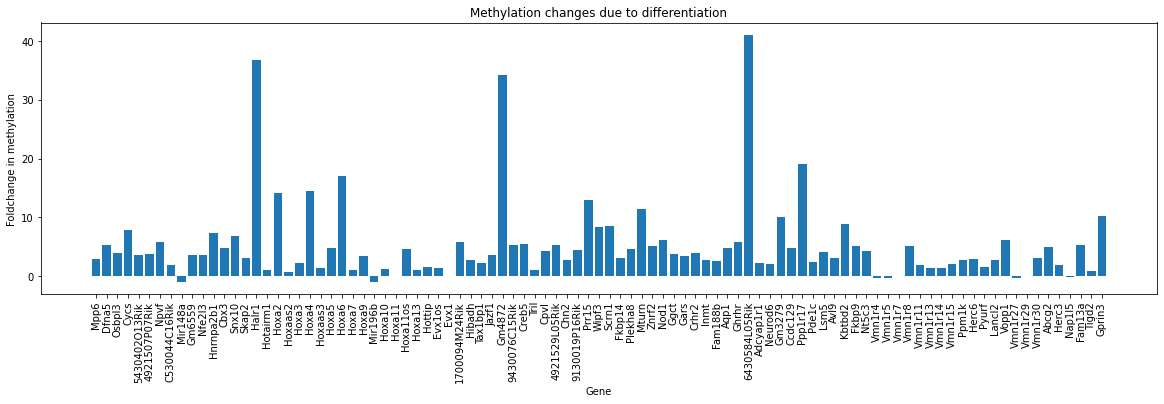

In [139]:
fig, ax = plt.subplots(figsize= (20, 5))
ax.bar(fold_change.keys(), fold_change.values())
ax.set_xlabel('Gene')
plt.xticks(rotation = 90)
ax.set_ylabel('Foldchange in methylation')
ax.set_title('Methylation changes due to differentiation')
plt.show()